# A/B Testing and design

In [8]:
# Imports
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# 📝 Exercícios - parte 1 

## 1. Format and histograms

A/B designs consist of two groups, each containing data from different participants. This means a long format dataset is ideal. To get an understanding of the groups' data, histograms can be created, which are analyzed in the A/B tests to determine if they are significantly different.

A company has collected data on their employees and is interested in investigating whether those who are social drinkers, Drinker.yes are absent from work more often than those who are not social drinkers, Drinker.no. Transform the dataset from wide to long, then create a histogram of the social drinking groups and how often they are absent from work.

- Transform the absenteeism dataset to a long format called `longabsent`, denoting the drinking groups `Drinker.yes` and `Drinker.no` (in that order) in a column named `Group` and values in a column called `Absence`.

In [2]:
# Data
Absenteeism_at_work <- read_csv('datasets/Absenteeism_at_work.csv')
glimpse(Absenteeism_at_work)

Rows: 740 Columns: 21
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (21): ID, Reason for absence, Month of absence, Day of the week, Seasons...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 740
Columns: 21
$ ID                                <dbl> 11, 36, 3, 7, 11, 3, 10, 20, 14, 1, …
$ `Reason for absence`              <dbl> 26, 0, 23, 7, 23, 23, 22, 23, 19, 22…
$ `Month of absence`                <dbl> 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, …
$ `Day of the week`                 <dbl> 3, 3, 4, 5, 5, 6, 6, 6, 2, 2, 2, 3, …
$ Seasons                           <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ `Transportation expense`          <dbl> 289, 118, 179, 279, 289, 179, 361, 2…
$ `Distance from Residence to Work` <dbl> 36, 13, 51, 5, 36, 51, 52, 50, 12, 1…
$ `Service time`                    <dbl> 13, 18, 18, 14, 13, 18, 3, 11, 14, 1…
$ Age                               <dbl> 33, 50, 38, 39, 33, 38, 28, 36, 34, …
$ `Work load Average/day`           <dbl> 239.554, 239.554, 239.554, 239.554, …
$ `Hit target`                      <dbl> 97, 97, 97, 97, 97, 97, 97, 97, 97, …
$ `Disciplinary failure`            <dbl> 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ Education       

In [3]:
# Formating data for the exercise
absenteeism <- Absenteeism_at_work %>%
	select(ID, `Absenteeism time in hours`, `Social drinker`) %>%
	mutate(Group = ifelse(`Social drinker` == 1, "Drinker.yes", "Drinker.no"),
		  Absence = `Absenteeism time in hours`,
		  ID = seq(1, 740)) %>%
	select(-`Social drinker`, -`Absenteeism time in hours`)

head(absenteeism)

ID,Group,Absence
<int>,<chr>,<dbl>
1,Drinker.yes,4
2,Drinker.yes,0
3,Drinker.yes,2
4,Drinker.yes,4
5,Drinker.yes,2
6,Drinker.yes,2


- Em geral, os dados são encontrados no seguinte formato:

In [4]:
absenteeism <- absenteeism %>%
  pivot_wider(names_from = Group, values_from = Absence)

head(absenteeism)

ID,Drinker.yes,Drinker.no
<int>,<dbl>,<dbl>
1,4,NA
2,0,NA
3,2,NA
4,4,NA
5,2,NA
6,2,NA


- Por isso, é bom recordar como transformamos um formato `wide` num formato `long`. Note que inicialmente já temos os dados da maneira que queremos, porém a título de ilustração, formatamos para o wide e agora voltaremos para o long.
- Note que também mudamos o ID para que seja único, uma vez que havia repetições de ID. E, para que o teste A/B faça sentido, os indivíduos não podem se repetir. Precisamos de uma observção por linha, sendo que cada linha representa um indivíduo. 

ID,Group,Absence
<int>,<chr>,<dbl>
1,Drinker.yes,4
2,Drinker.yes,0
3,Drinker.yes,2
4,Drinker.yes,4
5,Drinker.yes,2
6,Drinker.yes,2


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


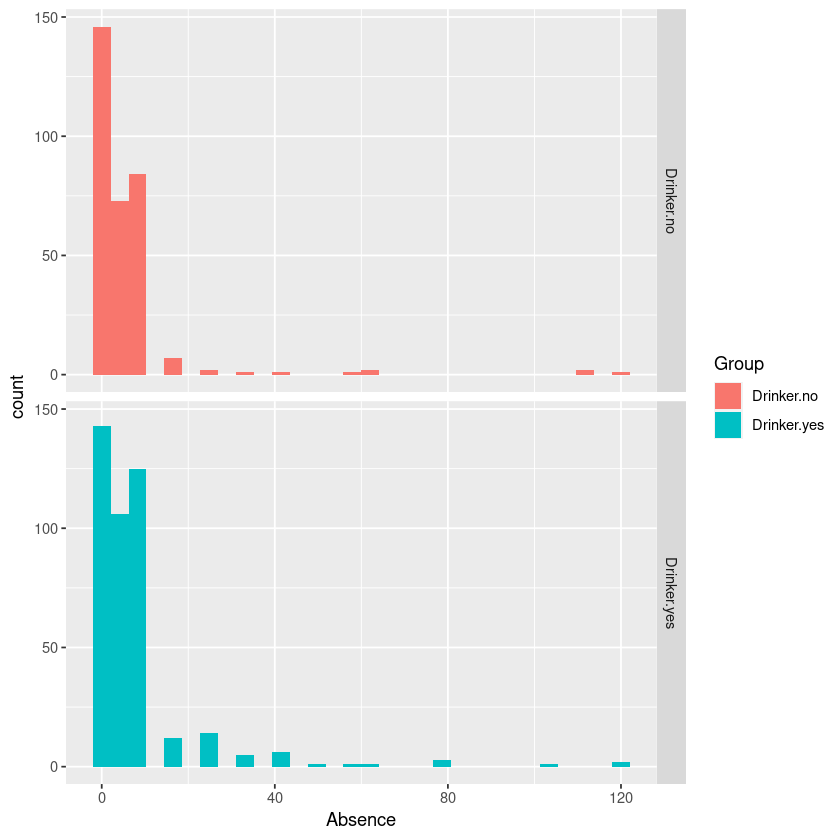

In [5]:
# Transform the data from wide to long
longabsent <- absenteeism %>% pivot_longer(cols = c("Drinker.yes", "Drinker.no"),
                                           names_to = "Group",
                                           values_to = "Absence") %>%
							  na.omit()
head(longabsent)

# Create a histogram of each group
ggplot(longabsent, aes(x = Absence, fill = Group)) + 
  geom_histogram() + 
  facet_grid(Group~.)

- Num primeiro momento, não nota-se uma diferança na distribuição de "Absence" quando comparamos as pessoas que bebem com as que não bebem.

# Considerations in A/B testing

## Type I error in A/B tests

In A/B tests, there are multiple considerations that come into play when obtaining a sample that accurately represents the population.

If the population is not accurately represented with the data used in the analysis, a Type I error can be found, providing an incorrect result or conclusion. Factors influencing the likelihood of a Type I error should be monitored to be aware of, and reduce, the Type I error rate.

Which of the following considerations is likely to increase the likelihood of obtaining a Type I error?

- Fluctuations in the sample collected
- Number of variables 
- Number of tests
- All of the above ✅

# 📝 Exercícios - parte 2 

In [6]:
# generate data for the exercise
distribution <- rnorm(50000)

> **1. Sampling**

The sample gathered can be plotted with a histogram to assess the sample distribution, visualizing whether the sample distribution is similar to the assumed distribution of the population.

Make a histogram of the original, normal distribution of 50,000 data points, then gather a small sample to plot and large sample to plot in order to visualize the change in distribution with sample size.

**1. Create a histogram of the parent distribution with ten bins.**


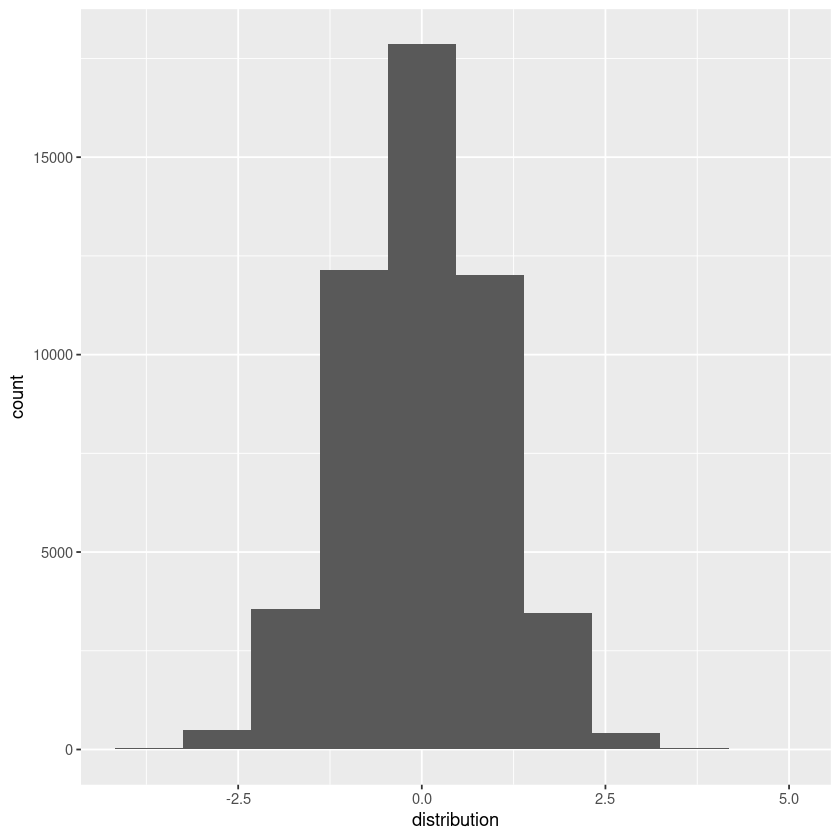

In [7]:
ggplot() +
	aes(distribution) +
	geom_histogram(bins = 10)

**2. Save a random sample of ten data points from distribution as small
Plot a histogram of the small sample with ten bins**

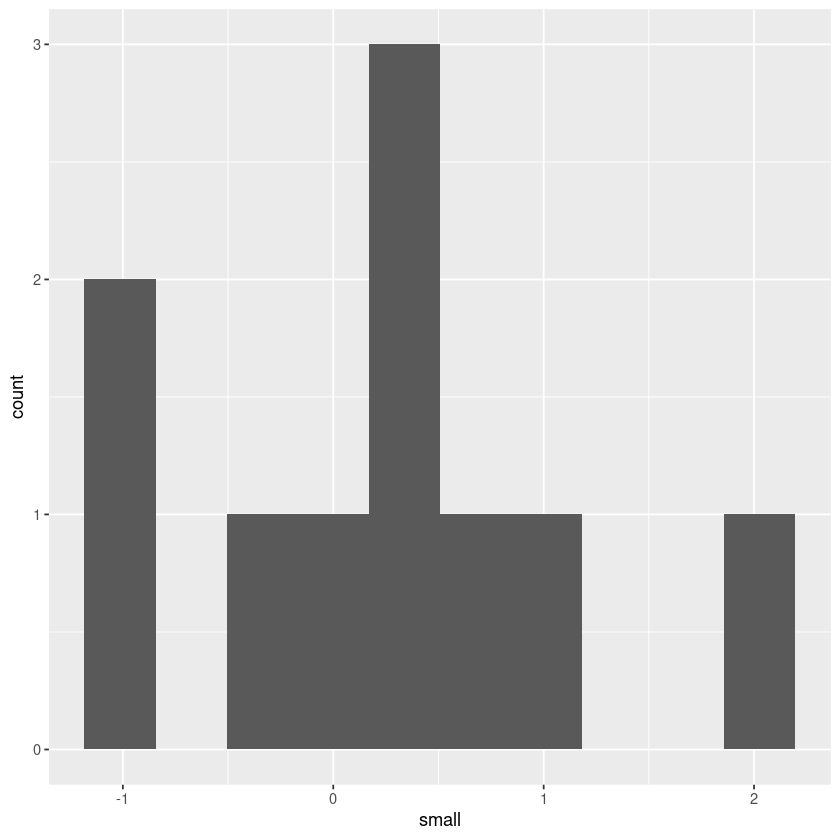

In [8]:
# Take a random sample of ten data points and create a histogram
small <- sample(distribution, 10)
ggplot() + aes(small) + geom_histogram(bins = 10)

**3. Save a random sample of 100 data points from distribution as large and plot a histogram of the sample with ten bins.**

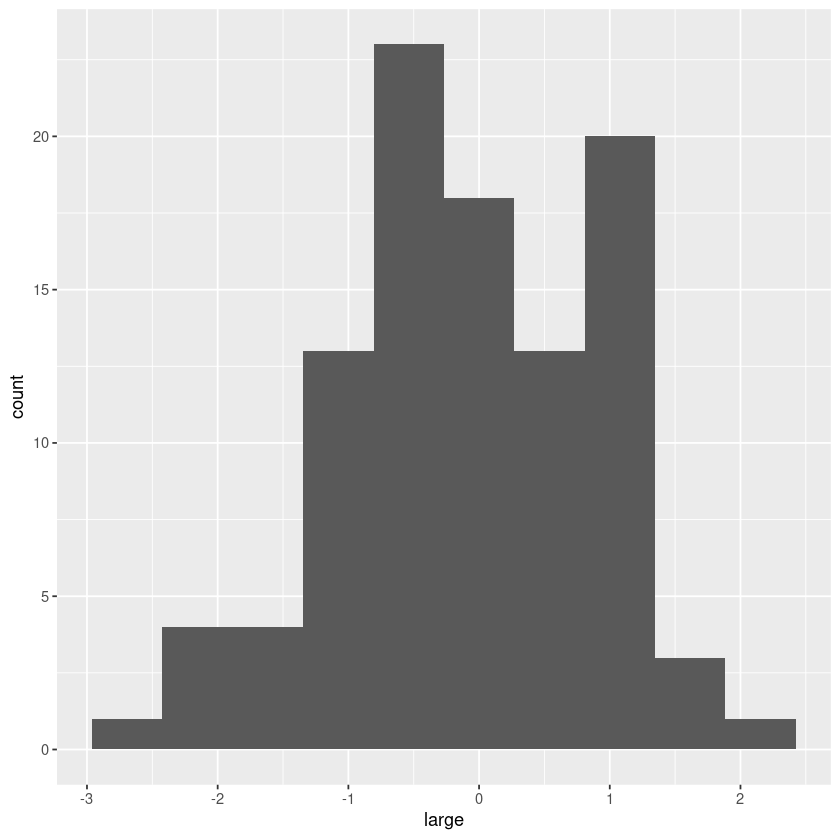

In [9]:
# Take a random sample of 100 data points and create a histogram
large <- sample(distribution, 100)
ggplot() + aes(large) + geom_histogram(bins = 10)

> **2. Family-wise error rate**

The likelihood of finding a Type I error increases with the number of tests being run. The significance level and number of tests being run can be used to determine the Family-wise error rate, or the likelihood of obtaining one or more false positives, or Type I errors, when running multiple tests.

Derive the Family-wise error rate for a small and large number of tests, noting the increase in likelihood of a false positive being found among the group of tests.

**1. Find the family-wise error rate of running five tests with a standard 5% significance level (alpha of 0.05).**

$$
1 - \text{Probability of no false positives}
$$

In [10]:
1 - (0.95)^5

[1] 0.2262191

**2. Find the family-wise error rate of running 20 tests with a standard 5% significance level (alpha of 0.05)**


In [11]:
1 - (0.95)^20

[1] 0.6415141

**3. Find the family-wise error rate of running 20 tests with a 1% significance level (alpha of 0.01)**

In [12]:
1 - (0.99)^20

[1] 0.1820931

Awesome! Note that with more tests and the same significance level, the greater the likelihood of obtaining a Type I error.

# Power and sample size

In [4]:
# install.packages("pwr")
library(pwr)

In [5]:
pwr.t.test(d = .8, power = 0.8, sig.level = 0.05, type = "one.sample", 
		  alternative = "two.sided")


     One-sample t test power calculation 

              n = 14.30276
              d = 0.8
      sig.level = 0.05
          power = 0.8
    alternative = two.sided


- Precisamos de uma amostra de tamanho 15 para atingir o poder necessário. 

> O que impacta o poder de um teste?

- Tamanho amostral
- Alpha (nível de significância)
- Tamanho do efeito

# 📝 Exercícios - parte 3

> **Determine the ideal sample size**

When running an experiment and statistical analyses of any sort, sample size is an important consideration. A sample size that is too small will not reveal an effect, regardless of if there is an effect present to be found. Prior to collecting data, a power analysis can be run to determine the minimum sample size that must be collected to effectively detect an effect, dependent on the analysis that will be performed on the collected data.

Perform a one sample t-test, one group, on experimental data and need to determine the sample size required for a one sample t-test to achieve a large effect size and power with an alpha of 0.05.

- Load the `pwr` package needed to run a power analysis for the one sample t-test.
- Use `pwr.t.test()` to determine the sample size needed for a two-tailed, one sample t-test with an effect size of `0.8`, power of `0.9`, and significance of `0.05`.

In [6]:
# Load the `pwr` package
library(pwr)

# Determine the sample size needed for a one sample t-test
pwr.t.test(d = 0.8, power = 0.9, sig.level = 0.05, type = "one.sample" , alternative = "two.sided")


     One-sample t test power calculation 

              n = 18.44624
              d = 0.8
      sig.level = 0.05
          power = 0.9
    alternative = two.sided


> **Regression to the mean**

A sample size that is too small will not reveal an effect or be representative of the population.

This exercise assesses regression to the mean, using one-sample t-tests of one group, on the amount of time employees have been in a job position.

The absent dataset, pwr, and ggplot2 packages have been loaded for you. The time spent as an employee in the absent dataset has been sub-organized into three samples. The smallsamp list contains a random sample of 15 data points, the largesamp list contains 400 data points, and the allsamp list contains all 740 data points.

In [9]:
absent <- read.csv("datasets/Absenteeism_at_work.csv")
glimpse(absent)

Rows: 740
Columns: 21
$ ID                              <int> 11, 36, 3, 7, 11, 3, 10, 20, 14, 1, 20…
$ Reason.for.absence              <int> 26, 0, 23, 7, 23, 23, 22, 23, 19, 22, …
$ Month.of.absence                <int> 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,…
$ Day.of.the.week                 <int> 3, 3, 4, 5, 5, 6, 6, 6, 2, 2, 2, 3, 4,…
$ Seasons                         <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ Transportation.expense          <int> 289, 118, 179, 279, 289, 179, 361, 260…
$ Distance.from.Residence.to.Work <int> 36, 13, 51, 5, 36, 51, 52, 50, 12, 11,…
$ Service.time                    <int> 13, 18, 18, 14, 13, 18, 3, 11, 14, 14,…
$ Age                             <int> 33, 50, 38, 39, 33, 38, 28, 36, 34, 37…
$ Work.load.Average.day.          <dbl> 239.554, 239.554, 239.554, 239.554, 23…
$ Hit.target                      <int> 97, 97, 97, 97, 97, 97, 97, 97, 97, 97…
$ Disciplinary.failure            <int> 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ Education       

In [25]:
smallsamp <- sample(absent$Service.time, 15)
largesamp <- sample(absent$Service.time, 400)
allsamp <- absent$Service.time

In [26]:
summary(allsamp)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    9.00   13.00   12.55   16.00   29.00 

In [27]:
# Run three t-tests, one on each sample size
t.test(smallsamp)
t.test(largesamp)
t.test(allsamp)


	One Sample t-test

data:  smallsamp
t = 11.103, df = 14, p-value = 2.52e-08
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 10.21974 15.11359
sample estimates:
mean of x 
 12.66667 



	One Sample t-test

data:  largesamp
t = 59.576, df = 399, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 12.43806 13.28694
sample estimates:
mean of x 
  12.8625 



	One Sample t-test

data:  allsamp
t = 77.883, df = 739, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 12.23761 12.87050
sample estimates:
mean of x 
 12.55405 


- Embora todos os testes tenham dado significativos, o p-valor diminui com o aumento do tamanho amostral, bam como o intervalo de confiança do teste. 

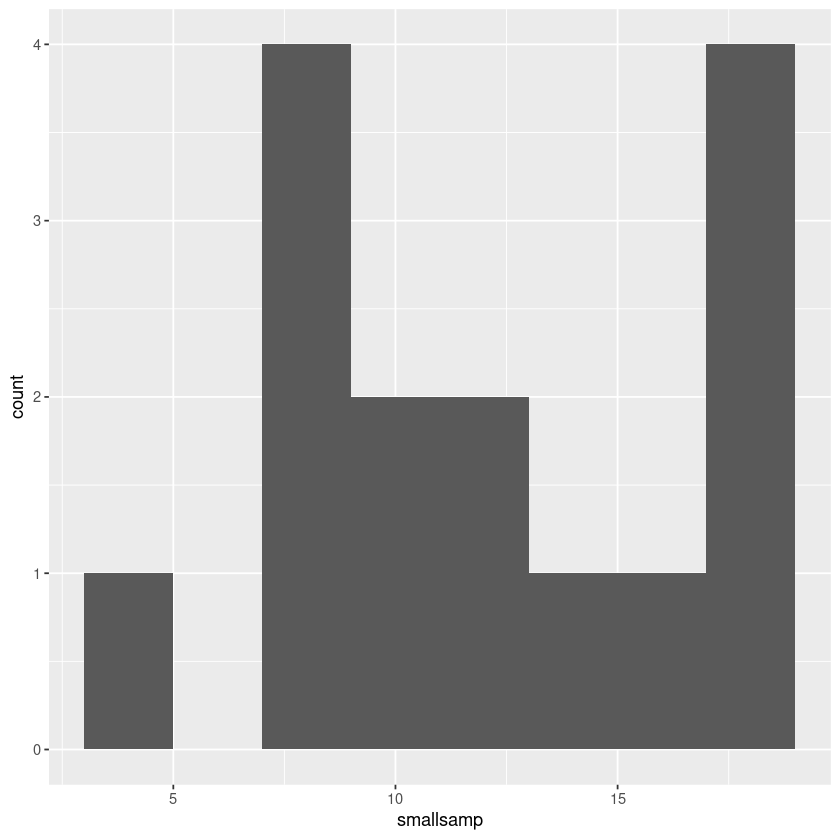

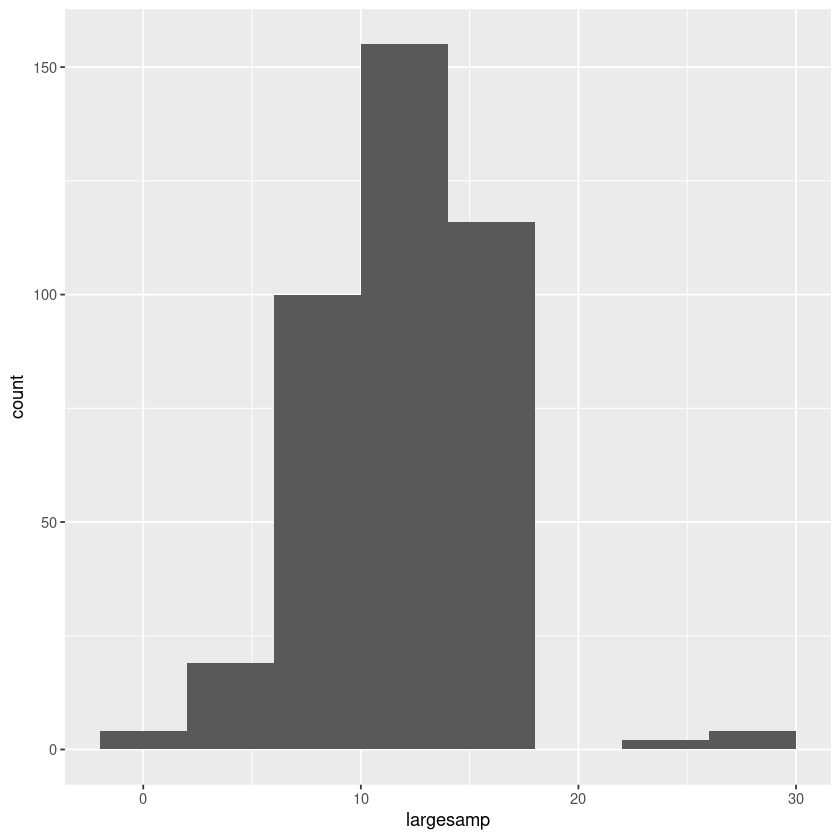

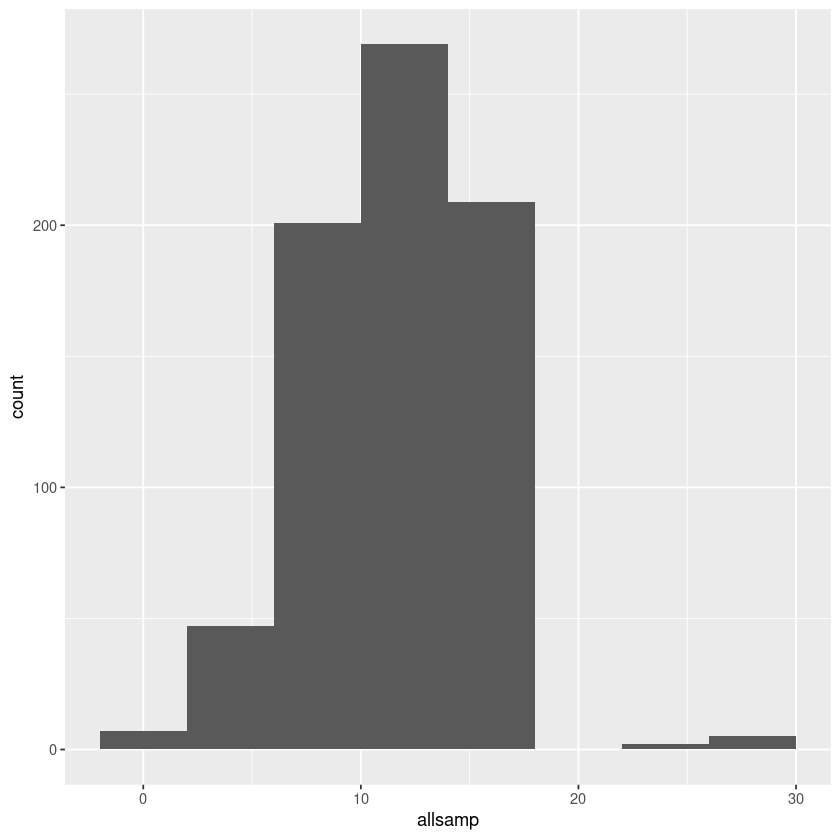

In [28]:
# Create histogram of each sample size with eight bins
ggplot() + aes(smallsamp) + geom_histogram(bins = 8)
ggplot() + aes(largesamp) + geom_histogram(bins = 8)
ggplot() + aes(allsamp) + geom_histogram(bins = 8)

- Com o aumento do tamanho amostral vemos como o valor da estat'sitca de teste t é alterado, indo de 10 até 77, além da forma do histograma, resultando em uma representação mais acurada da média da população. 